In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Slope (pendiente): 0.0178 ± 0.0007
Intercept (intercepto): -1.2753 ± 1.1495


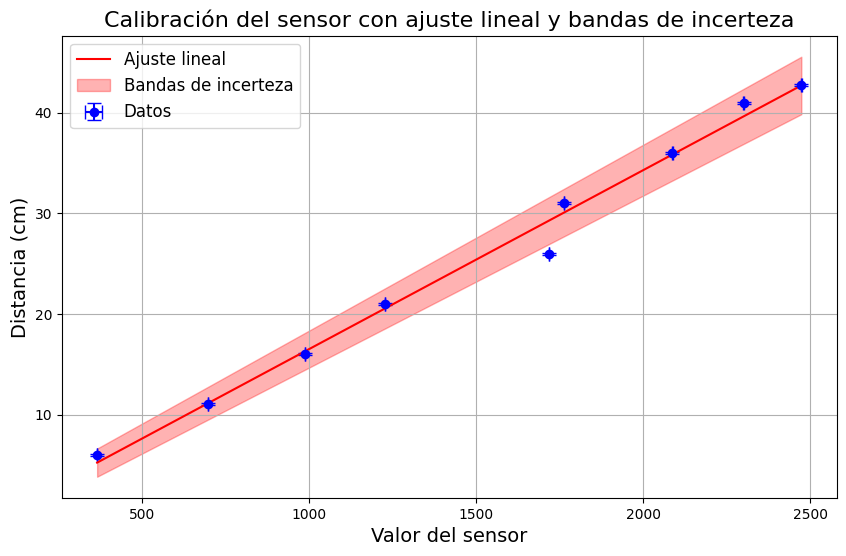

In [2]:
# Constants
DISTANCIA_INICIAL = 56
Y_ERR = 0.1  # cm, error in the x-axis

datos_calibracion = {
    "Distancia (cm)": [50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 13.2],
    "Valor del sensor": [365, 697, 987, 1227, 1718, 1763, 2087, 2300, 2473],
    "Error": [0, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(datos_calibracion)

# Adjust the 'Distancia (cm)' by subtracting from the initial distance
df['Distancia (cm)'] = DISTANCIA_INICIAL - df['Distancia (cm)']

# Perform the linear regression
fitted_lines_for_data = stats.linregress(df['Valor del sensor'], df['Distancia (cm)'])

# Extract the slope and intercept, and their standard deviations
slope = fitted_lines_for_data.slope
intercept = fitted_lines_for_data.intercept
slope_std_err = fitted_lines_for_data.stderr
intercept_std_err = fitted_lines_for_data.intercept_stderr

# Print the linear coefficients and their standard deviations
print(f"Slope (pendiente): {slope:.4f} ± {slope_std_err:.4f}")
print(f"Intercept (intercepto): {intercept:.4f} ± {intercept_std_err:.4f}")

# Prepare the fit line
x_fit = np.linspace(min(df['Valor del sensor']), max(df['Valor del sensor']), 500)
y_fit = slope * x_fit + intercept

# Calculate the standard error of the estimate
y_err_fit = slope_std_err * x_fit + intercept_std_err

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data points with error bars on both axes
plt.errorbar(df["Valor del sensor"], df['Distancia (cm)'], yerr=Y_ERR, xerr=df["Error"], fmt='o', color='blue', label='Datos', capsize=5)

# Plot the linear fit
plt.plot(x_fit, y_fit, 'r', label='Ajuste lineal')

# Plot the uncertainty bands
plt.fill_between(x_fit, y_fit + y_err_fit, y_fit - y_err_fit, color='red', alpha=0.3, label='Bandas de incerteza')

# Customize the plot
plt.ylabel('Distancia (cm)', fontsize=14)
plt.xlabel('Valor del sensor', fontsize=14)
plt.title('Calibración del sensor con ajuste lineal y bandas de incerteza', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


# Nuestro sigma_v = 1
# Nuestro sigma_m = 0.0007
# Nuestro sigma_b = 1.1495
# --> sigma_d = m*sigma_v + sigma_m*v + sigma_b = 
#             = 0.0178*1 + 0.0007*v + 1.1495 = 
#             = 0.0007*v + 1.1673

def distancia(v):
    return 0.0178*v - 1.2753

def sigma_d(v):
    return 0.0007*v + 1.1673


In [4]:
# Ejemplo real de uso

# Valor del sensor
v = 600

# Distancia estimada
d = distancia(v)
print(f"Distancia estimada: {d:.3f} cm")

# Incerteza en la distancia
sigma_de = sigma_d(v)
print(f"Incerteza en la distancia: {sigma_de:.3f} cm")

Distancia estimada: 9.405 cm
Incerteza en la distancia: 1.587 cm
